In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc
import matplotlib.gridspec as gridspec



%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# load session data frame
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222168.1\09_08_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222169.2\26_08_2019\TwoTower_Timeout_0.sqlite
file doesn't exist, errors to come!!!


In [3]:
morph_rare = ['4139265.3','4139265.4','4139265.5','4222168.1']
morph_familiar = ['4222153.1','4222153.2','4222153.3','4222174.1','4222154.1']

In [4]:
def plot_num_cells(mice, first_sess = []): #,fax = None):
    
    N = len(mice)
#     if fax is None:
#         f,ax = plt.subplots()
#     else:
#         f,ax = fax
    NCells = [] 
    for i,(mouse,_fs) in enumerate(zip(mice,first_sess)):
        df_mouse = df[df['MouseName'].str.match(mouse)]
        ncells = []
        
        for sess_ind in range(_fs,df_mouse.shape[0]):
            sess = df_mouse.iloc[sess_ind]
            VRDat, C, S, A = pp.load_scan_sess(sess,fneu_coeff=.7,analysis='s2p')
            ncells.append(S.shape[1])
        
        NCells.append(ncells)
#         ax.plot(np.arange(8,8+len(ncells)),ncells,color=cm(np.float(i)/N),marker='x')
    return NCells#, f,ax
    

In [38]:
def plot_num_trials(mice, first_sess = []): #,fax = None):
    
    N = len(mice)
#     if fax is None:
#         f,ax = plt.subplots()
#     else:
#         f,ax = fax
    NTrials = [] 
    for i,(mouse,_fs) in enumerate(zip(mice,first_sess)):
        print(mouse)
        df_mouse = df[df['MouseName'].str.match(mouse)]
        ntrials = []
        
        for sess_ind in range(_fs,df_mouse.shape[0]):
            print(sess_ind)
            sess = df_mouse.iloc[sess_ind]
            VRDat = pp.behavior_dataframe(sess['data file'])
            trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
            ntrials.append(trial_info['rewards'].shape[0])
        
        NTrials.append(ntrials)
#         ax.plot(np.arange(8,8+len(ncells)),ncells,color=cm(np.float(i)/N),marker='x')
    return NTrials#, f,ax

In [5]:
rare_NCells = plot_num_cells(morph_rare,[2,2,2,0])
# ax.set_ylim([0,2200])
# f.savefig("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures\\python_outputs\\cellcount_rare.pdf",format="pdf")

num aberrant ttls 0.0
22392 (22392,) (22392, 21) 74301
(74301,) (74301, 21)


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0
num aberrant ttls 0.0
30909 (30909,) (30909, 21) 102031
(102031,) (102031, 21)
frame diff 0
num aberrant ttls 0.0
27389 (27389,) (27389, 21) 90435
(90435,) (90435, 21)
frame diff 0
num aberrant ttls 0.0
35085 (35085,) (35085, 21) 115307
(115307,) (115307, 21)
frame diff 0
num aberrant ttls 0.0
33140 (33140,) (33140, 21) 109003
(109003,) (109003, 21)
frame diff 0
num aberrant ttls 0.0
38209 (38209,) (38209, 21) 126969
(126969,) (126969, 21)
frame diff 0
num aberrant ttls 0.0
33547 (33547,) (33547, 21) 110218
(110218,) (110218, 21)
frame diff 0
num aberrant ttls 0.0
32038 (32038,) (32038, 21) 105022
(105022,) (105022, 21)
frame diff 0
num aberrant ttls 0.0
13506 (13506,) (13506, 21) 45655
(45655,) (45655, 21)
frame diff 0
num aberrant ttls 0.0
24444 (24444,) (24444, 21) 81436
(81436,) (81436, 21)
frame diff 0
num aberrant ttls 0.0
23918 (23918,) (23918, 21) 77428
(77428,) (77428, 21)
frame diff 0
num aberrant ttls 0.0
30897 (30897,) (30897, 21) 102093
(102093,) (102093, 21)


In [39]:
rare_NTrials = plot_num_trials(morph_rare,[2,2,2,0])

4139265.3
2
3
4
5
6
7
8
9
4139265.4
2
3
4
5
6
7
8
9
10
4139265.5
2
3
4
5
6
7
8
9
4222168.1
0
1
2
3
4
5
6
7


In [6]:
fam_NCells = plot_num_cells(morph_familiar,[1,1,1,1,1])
# ax.set_ylim([0,2200])
# f.savefig("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures\\python_outputs\\cellcount_all.pdf",format="pdf")

num aberrant ttls 0.0
one frame correction
31722 (31722,) (31722, 21) 103701
(103701,) (103701, 21)
frame diff 0
num aberrant ttls 0.0
34372 (34372,) (34372, 21) 112702
(112702,) (112702, 21)
frame diff 0
num aberrant ttls 0.0
33253 (33253,) (33253, 21) 109955
(109955,) (109955, 21)
frame diff 0
num aberrant ttls 0.0
36036 (36036,) (36036, 21) 118455
(118455,) (118455, 21)
frame diff 0
num aberrant ttls 0.0
33778 (33778,) (33778, 21) 111444
(111444,) (111444, 21)
frame diff 0
num aberrant ttls 0.0
35977 (35977,) (35977, 21) 118959
(118959,) (118959, 21)
frame diff 0
num aberrant ttls 0.0
35978 (35978,) (35978, 21) 119008
(119008,) (119008, 21)
frame diff 0
num aberrant ttls 0.0
28754 (28754,) (28754, 21) 94349
(94349,) (94349, 21)
frame diff 0
num aberrant ttls 0.0
35100 (35100,) (35100, 21) 115409
(115409,) (115409, 21)
frame diff 0
num aberrant ttls 0.0
35248 (35248,) (35248, 21) 116195
(116195,) (116195, 21)
frame diff 0
num aberrant ttls 0.0
33545 (33545,) (33545, 21) 121243
(12124

In [40]:
fam_NTrials = plot_num_trials(morph_familiar,[1,1,1,1,1])

4222153.1
1
2
3
4
5
6
4222153.2
1
2
3
4
5
6
7
4222153.3
1
2
3
4
5
4222174.1
1
2
3
4
5
6
7
8
4222154.1
1
2
3
4
5
6
7
8


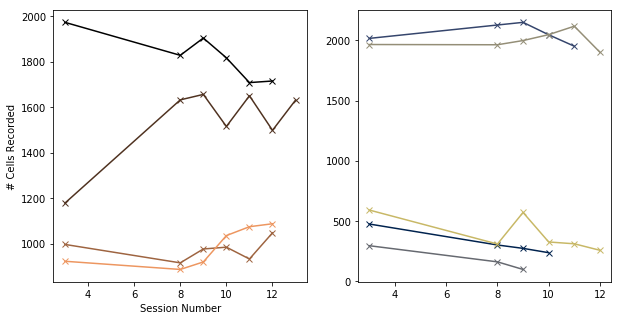

In [25]:
f,ax = plt.subplots(1,2,figsize=[10,5])
sessNum = [3,5,7,8,9,10,11,12,13,14]
for i,rm in enumerate(rare_NCells):
    inds = [0]
    for j in range(3,len(rm)):
        inds.append(j)
    ax[0].plot([sessNum[k] for k in inds],[rm[k] for k in inds],color=plt.cm.copper(np.float(i)/len(rare_NCells)),marker='x')
    
for i,fm in enumerate(fam_NCells):
    inds = [0]
    for j in range(3,len(fm)):
        inds.append(j)
    ax[1].plot([sessNum[k] for k in inds],[fm[k] for k in inds],color=plt.cm.cividis(np.float(i)/len(fam_NCells)),marker='x')
    
ax[0].set_ylabel("# Cells Recorded")
ax[0].set_xlabel("Session Number")
f.savefig("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures\\python_outputs\\cellcount_all.pdf",format="pdf")

In [41]:
for (_rt,_rm,_m) in zip(rare_NTrials,rare_NCells,morph_rare):
    print(_m)
    for _s,_t,_c in zip(sessNum,_rt,_rm):
        print('sess',_s,'trials',_t,'cells',_c)

4139265.3
sess 3 trials 90 cells 1973
sess 5 trials 90 cells 1779
sess 7 trials 100 cells 1915
sess 8 trials 120 cells 1828
sess 9 trials 120 cells 1904
sess 10 trials 120 cells 1817
sess 11 trials 120 cells 1708
sess 12 trials 120 cells 1715
4139265.4
sess 3 trials 60 cells 1178
sess 5 trials 100 cells 1494
sess 7 trials 100 cells 1686
sess 8 trials 120 cells 1632
sess 9 trials 120 cells 1656
sess 10 trials 120 cells 1515
sess 11 trials 120 cells 1650
sess 12 trials 120 cells 1498
sess 13 trials 120 cells 1631
4139265.5
sess 3 trials 90 cells 996
sess 5 trials 100 cells 1030
sess 7 trials 100 cells 994
sess 8 trials 120 cells 915
sess 9 trials 120 cells 976
sess 10 trials 120 cells 984
sess 11 trials 120 cells 932
sess 12 trials 120 cells 1047
4222168.1
sess 3 trials 60 cells 922
sess 5 trials 80 cells 1267
sess 7 trials 60 cells 1237
sess 8 trials 90 cells 886
sess 9 trials 100 cells 919
sess 10 trials 100 cells 1035
sess 11 trials 100 cells 1074
sess 12 trials 100 cells 1087


In [42]:
for (_ft,_fm,_m) in zip(fam_NTrials,fam_NCells,morph_familiar):
    print(_m)
    for _s,_t,_c in zip(sessNum,_ft,_fm):
        print('sess',_s,'trials',_t,'cells',_c)

4222153.1
sess 3 trials 92 cells 475
sess 5 trials 100 cells 482
sess 7 trials 100 cells 207
sess 8 trials 95 cells 301
sess 9 trials 100 cells 273
sess 10 trials 86 cells 237
4222153.2
sess 3 trials 80 cells 2016
sess 5 trials 100 cells 2154
sess 7 trials 120 cells 1888
sess 8 trials 120 cells 2127
sess 9 trials 120 cells 2149
sess 10 trials 100 cells 2046
sess 11 trials 85 cells 1951
4222153.3
sess 3 trials 120 cells 295
sess 5 trials 125 cells 295
sess 7 trials 120 cells 204
sess 8 trials 90 cells 161
sess 9 trials 50 cells 98
4222174.1
sess 3 trials 90 cells 1965
sess 5 trials 85 cells 1859
sess 7 trials 80 cells 2092
sess 8 trials 75 cells 1963
sess 9 trials 85 cells 1998
sess 10 trials 90 cells 2047
sess 11 trials 70 cells 2117
sess 12 trials 80 cells 1901
4222154.1
sess 3 trials 120 cells 591
sess 5 trials 120 cells 392
sess 7 trials 120 cells 315
sess 8 trials 120 cells 309
sess 9 trials 100 cells 571
sess 10 trials 100 cells 326
sess 11 trials 90 cells 311
sess 12 trials 100 c

## 